In [1]:
import os
import sys
sys.path.insert(0, "/home/qiyuan/sp/mitsuba3/build/python")

import mitsuba as mi
import drjit as dr

from typing import Union
import matplotlib.pyplot as plt
import numpy as np


print("Loaded Mitsuba from: ", os.path.dirname(mi.__file__))
print("Loaded Mitsuba from: ", os.path.dirname(dr.__file__))

mi.set_variant("cuda_ad_rgb")

scene_path = "/home/qiyuan/sp/mitsuba3/notebooks/linear_curve.xml"
scene = mi.load_file(scene_path)

Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/mitsuba
Loaded Mitsuba from:  /home/qiyuan/sp/mitsuba3/build/python/drjit


2022-11-05 16:09:35 INFO main [xml.cpp:1405] Loading XML file "/home/qiyuan/sp/notebooks/linear_curve.xml" with variant "cuda_ad_rgb"..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/depth.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/independent.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/tent.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/hdrfilm.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/perspective.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/linearcurve.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/diffuse.so" ..

2022-11-05 16:09:35 DEBUG main [PluginManager] Loading plugin "plugins/uniform.so" ..

2022-11-05 16:09:35 DEBUG main [LinearCurve] Loading a linear curve file from "linear_sample_1.txt" ..

2022-11-05 16:09:35 DEBUG main [LinearCurve] Loaded a control point [-1.5, -1.5, 0] with radius 0.010000

2022-11-05 16:09:35 DEBUG main [LinearCurve] Loaded a control point [-1, 0.5, 3] with radius 0.400000

2022-11-05 16:09:35 DEBUG main [LinearCurve] Loaded a control point [1, 0.5, 3] with radius 0.400000

2022-11-05 16:09:35 DEBUG main [LinearCurve] Loaded a control point [1.5, -1.5, 0] with radius 0.400000

2022-11-05 16:09:35 DEBUG main [LinearCurve] Loaded a control point [0, 1, 0] with radius 0.010000

2022-11-05 16:09:35 DEBUG main [LinearCurve] "linear_sample_1.txt": read 5 control points (80 B in 3ms)

2022-11-05 16:09:35 INFO main [Scene] Building scene in OptiX ..

2022-11-05 16:09:35 DEBUG main [scene_optix.inl:76] Initialize Optix configuration (index=9)..

2022-11-05 16:09:35 DEBUG main [LinearCurve] Optix_build_input done for one linear curve, numVertices 5, numPrimitives 4

2022-11-05 16:09:35 DEBUG main [shapes.h:141] OptiXAccelBufferSizes tempSizeInBytes:3480 outputSizeInBytes:3428 tempUpdateSizeInBytes:552

2022-11-05 16:09:35 DEBUG main [Scene] ias.size() == 1

2022-11-05 16:09:35 INFO main [Scene] OptiX ready. (took 66ms)

2022-11-05 16:09:35 INFO main [xml.cpp:1422] Done loading XML file "/home/qiyuan/sp/notebooks/linear_curve.xml" (took 89ms).

In [2]:
image = mi.render(scene, spp=16)

2022-11-05 16:09:40 INFO main [SamplingIntegrator] Starting render job (1024x768, 16 samples)

2022-11-05 16:09:40 INFO main [SamplingIntegrator] Computation graph recorded. (took 3ms)

7.9894843


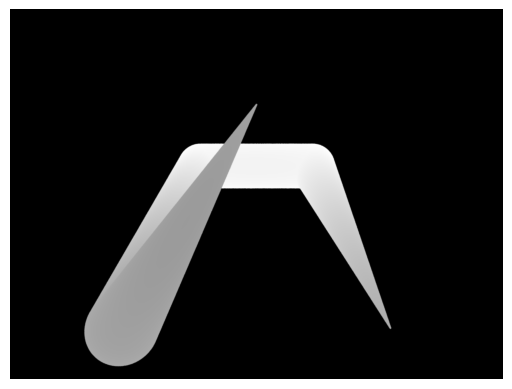

In [3]:
img_np = np.array(image)
print(img_np.max())
plt.axis("off")
plt.imshow(img_np / img_np.max()); # approximate sRGB tonemapping

In [4]:
mi.util.write_bitmap("./linear_mitsuba_optix_t_far.exr", image / 10.0)